# Gradient Descent utilizando sklearn
Exemplo com somente uma feature

Author: H3dema

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_regression

%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (16, 9)

In [3]:
# gera uma conjunto de dados (aprox. reta) aleatoriamente
n = 150  # numero de pontos (exemplos)
m = 1  # numero de características. Somente uma variável!

x_values, y_values = make_regression(n_samples=n,
                                     n_features=m, 
                                     random_state=0, 
                                     bias=10,
                                     noise=5,
                                     coef=False)

num features: 1


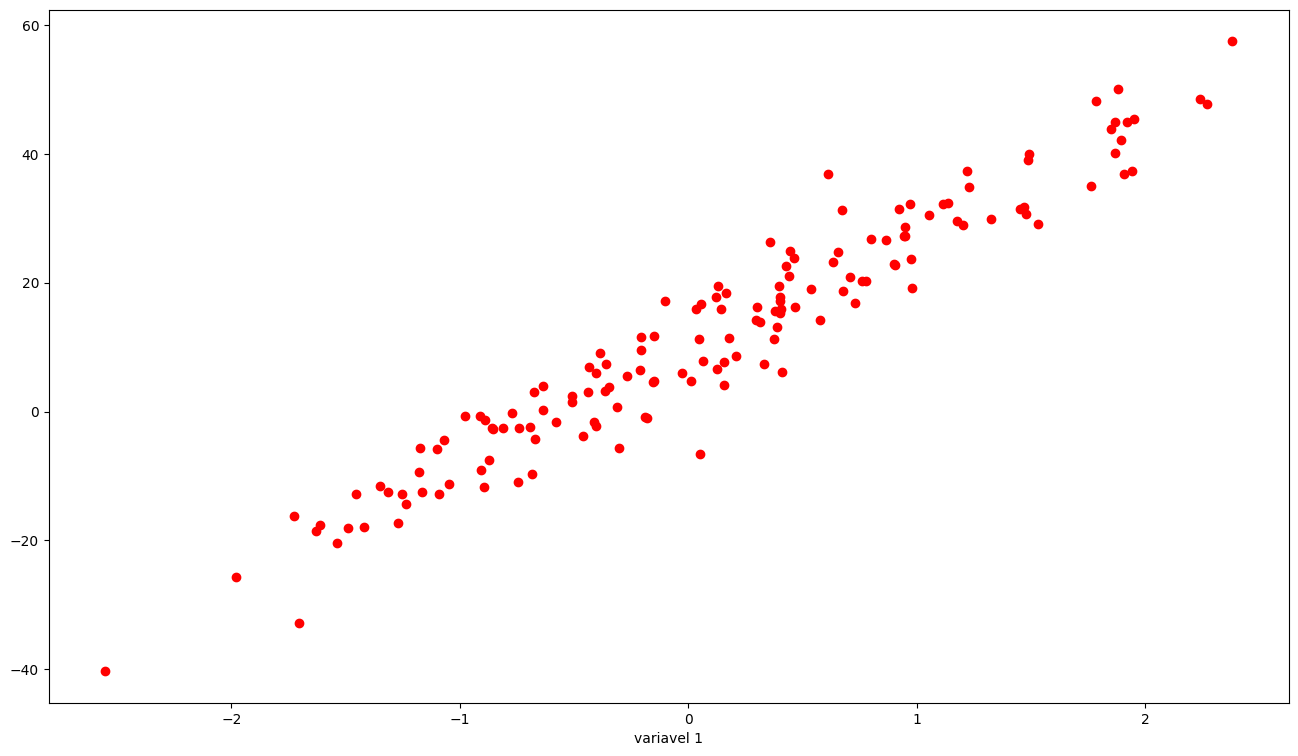

In [4]:
print("num features:", m)
plt.plot(x_values[:,0], y_values, 'ro')
plt.xlabel("variavel 1")
plt.show()

# Criando o regressor

SKLearm permite diversos tipos de ajuste:
* 'squared_error': ajuste dos mínimos quadrados (dependendo da versão era 'squared_loss')
* 'Huber' modifica 'squared_loss' para se concentrar menos em obter outliers corretos, passando de quadrado para perda linear após uma distância de epsilon.
* 'Epsilon_insensitive' ignora erros inferiores a epsilon e é linear a partir dai. Curiosidade: Esta é a função de perda usada no SVR.
* 'Squared_epsilon_insensitive' é o mesmo, mas se torna uma perda ao quadrado após uma tolerância do epsilon.

In [5]:
max_iter = 200  # número máximo de iterações

In [6]:
clf = linear_model.SGDRegressor(max_iter=max_iter,
                                loss='squared_error')
_ = clf.fit(x_values, y_values)

# imprime resultados
print("Intercept  :", clf.intercept_)
print("Coeficients:", clf.coef_)

print("Coef. Determinacao (r²):", clf.score(x_values, y_values))

erro = clf.predict(x_values)-y_values
print("Erro médio : ", np.mean(erro))
print("Erro mínimo: ", np.min(erro))
print("Erro máximo: ", np.max(erro))

Intercept  : [9.69381252]
Coeficients: [17.73679137]
Coef. Determinacao (r²): 0.932396576813997
Erro médio :  0.003303495673459077
Erro mínimo:  -16.355771103316336
Erro máximo:  17.221810826420477


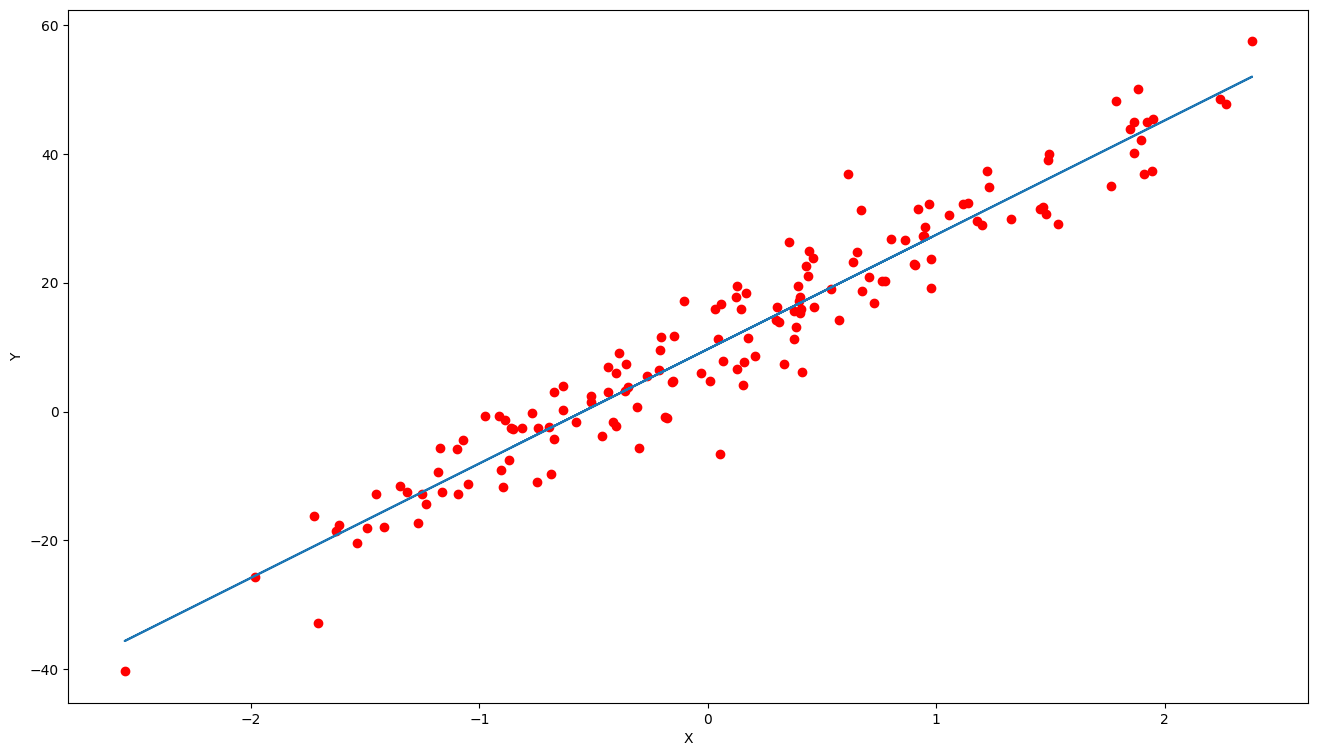

In [7]:
plt.plot(x_values, y_values, 'ro')
plt.plot(x_values, clf.predict(x_values))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

O método busca minimizar uma função que combina a perda $L$ e uma função de regularização $R$:

$\min \left [ \frac{1}{N} \sum_{i=1}^{N} L(y_i, \hat{y}_i) + \alpha R(w) \right ]$

onde $\hat{y}_i$ é o valor dado pela função de regressão para o ponto "i". $w$ são os parametros da regressão.


## Loss function $L(y_i, \hat{y}_i)$

- Squared_error &nbsp;

$L(y_i, \hat{y}_i) = \frac{1}{2} \left ( y_i - \hat{y}_i \right )^2$




-
3. Epsilon_insensit &nbsp;

$L(y_i, \hat{y}_i) = \max \left (0, \left| y_i - \hat{y}_i \right| - \epsilon \right )$v

- Squared_epsilon_insensitive &nbsp;



- Huber &nbsp;

$L(y_i, \hat{y}_i) = \begin{cases} \frac{1}{2} \left ( y_i - \hat{y}_i \right )^2 & \text{ if } \left| y_i - \hat{y}_i \right| \le \epsilon \\ \epsilon \left| y_i - \hat{y}_i \right| - \frac{1}{2}\epsilon^2 & \text{ otherwise } \end{cases} $
e



## Regularization

- L2 norm

$R(w) = \frac{1}{2} \sum_{j=1}^{M} w_j^2$


- L1 norm

$R(w) = \sum_{j=1}^{M} | w_j |$

In [8]:
clf = linear_model.SGDRegressor(
    max_iter=max_iter,
    loss='squared_error',
    penalty='l1',  # default é 'l2'
)
_ = clf.fit(x_values, y_values)

# imprime resultados
print("Intercept  :", clf.intercept_)
print("Coeficients:", clf.coef_)

print("Coef. Determinacao (r²):", clf.score(x_values, y_values))

erro = clf.predict(x_values)-y_values
print("Erro médio : ", np.mean(erro))
print("Erro mínimo: ", np.min(erro))
print("Erro máximo: ", np.max(erro))

Intercept  : [9.68450528]
Coeficients: [17.74748798]
Coef. Determinacao (r²): 0.9323967908032709
Erro médio :  -0.004662570015568761
Erro mínimo:  -16.358509780486717
Erro máximo:  17.213059220541574
